### Алгоритмы автофокусировки

#### Функции, основанные на дифференцировании изображений
В качестве меры фокусировки используются различные функции дифференцирования изображения:
1) Fth_grad = SUMmSUMn|g(i,j+1) - g(i,j)| while |g(i,j+1) - g(i,j)| >= V, g - интенсивность уровня серого
#### Функции, основанные на глубине пиков и впадин
1) Fth_grad = SUMmSUMng(i,j), while g(i,j) >= X - добавляет все пиксели, где уровень серого больше порогового

In [1]:
import numpy as np

from PIL import Image
from numpy import asarray

In [103]:
focused_image = Image.open('autofocus/image/focused.png')
unfocused_image = Image.open('autofocus/image/unfocused.png')

In [104]:
focused_data = asarray(focused_image)[5:590,5:390,0]
unfocused_data = asarray(unfocused_image)[5:590,5:390,0]

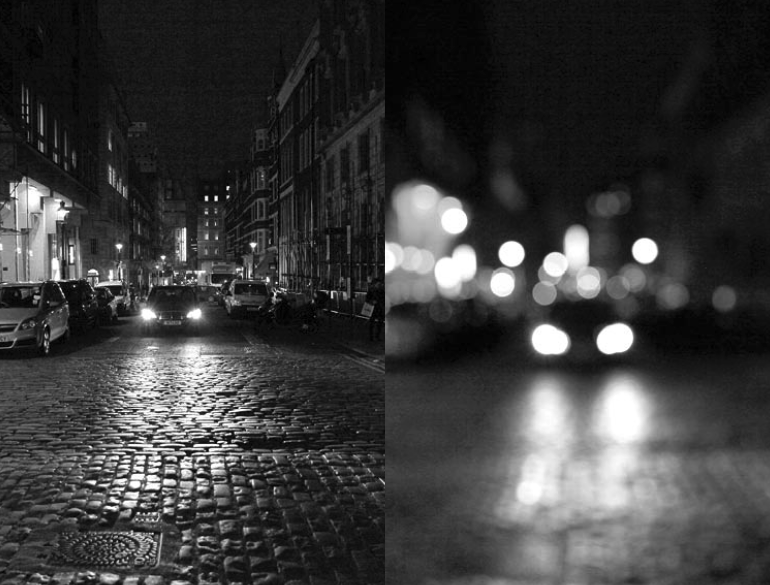

In [105]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

get_concat_h(Image.fromarray(focused_data), Image.fromarray(unfocused_data))

In [106]:
Image.fromarray(focused_data).size, Image.fromarray(unfocused_data).size

((385, 585), (385, 585))

In [107]:
focused_data.sum(), unfocused_data.sum()

(12124246, 14755623)

In [108]:
(focused_data > 125).sum(), (unfocused_data > 125).sum()

(22562, 39853)

In [110]:
def find_power(data: np.ndarray, threshold:int=10) -> int:
    power = 0
    counter = 0
    for i in data:
        for j in i:
            if (j - counter) ** 2 > threshold: power += j
            counter = j
        counter = 0
    return power

for tr in range(5, 65, 5):
    print(
        f'focused: {find_power(focused_data, threshold=tr)}',
        f'unfocused: {find_power(unfocused_data, threshold=tr)}'
    )

/var/folders/yh/dpg3jygn4m37p56tpm6q2y100000gp/T/ipykernel_46737/1833395312.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  if (j - counter) ** 2 > threshold: power += j


focused: 10087537 unfocused: 8146430
focused: 9595716 unfocused: 7315197
focused: 9595716 unfocused: 7315197
focused: 9209614 unfocused: 6793080
focused: 8872108 unfocused: 6455273
focused: 8872108 unfocused: 6455273
focused: 8872108 unfocused: 6455273
focused: 8575411 unfocused: 6246997
focused: 8575411 unfocused: 6246997
focused: 8339576 unfocused: 6108794
focused: 8339576 unfocused: 6108794
focused: 8339576 unfocused: 6108794
